# **Histogram with several groups**

#### ใช้เปรียบเทียบการกระจายข้อมูลแบบหลายๆกลุ่ม

> ### **การสร้าง 2 histogram ในแกนกราฟเดียวกัน**

#### ถ้ามีกลุ่มตัวแปรที่มากกว่า 2 สามารถทำบนกราฟแกนเดียวกันได้ ถ้ามีเพียง 2 ตัวแปร สามารถช้แบบ mirror ก็ได้

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message

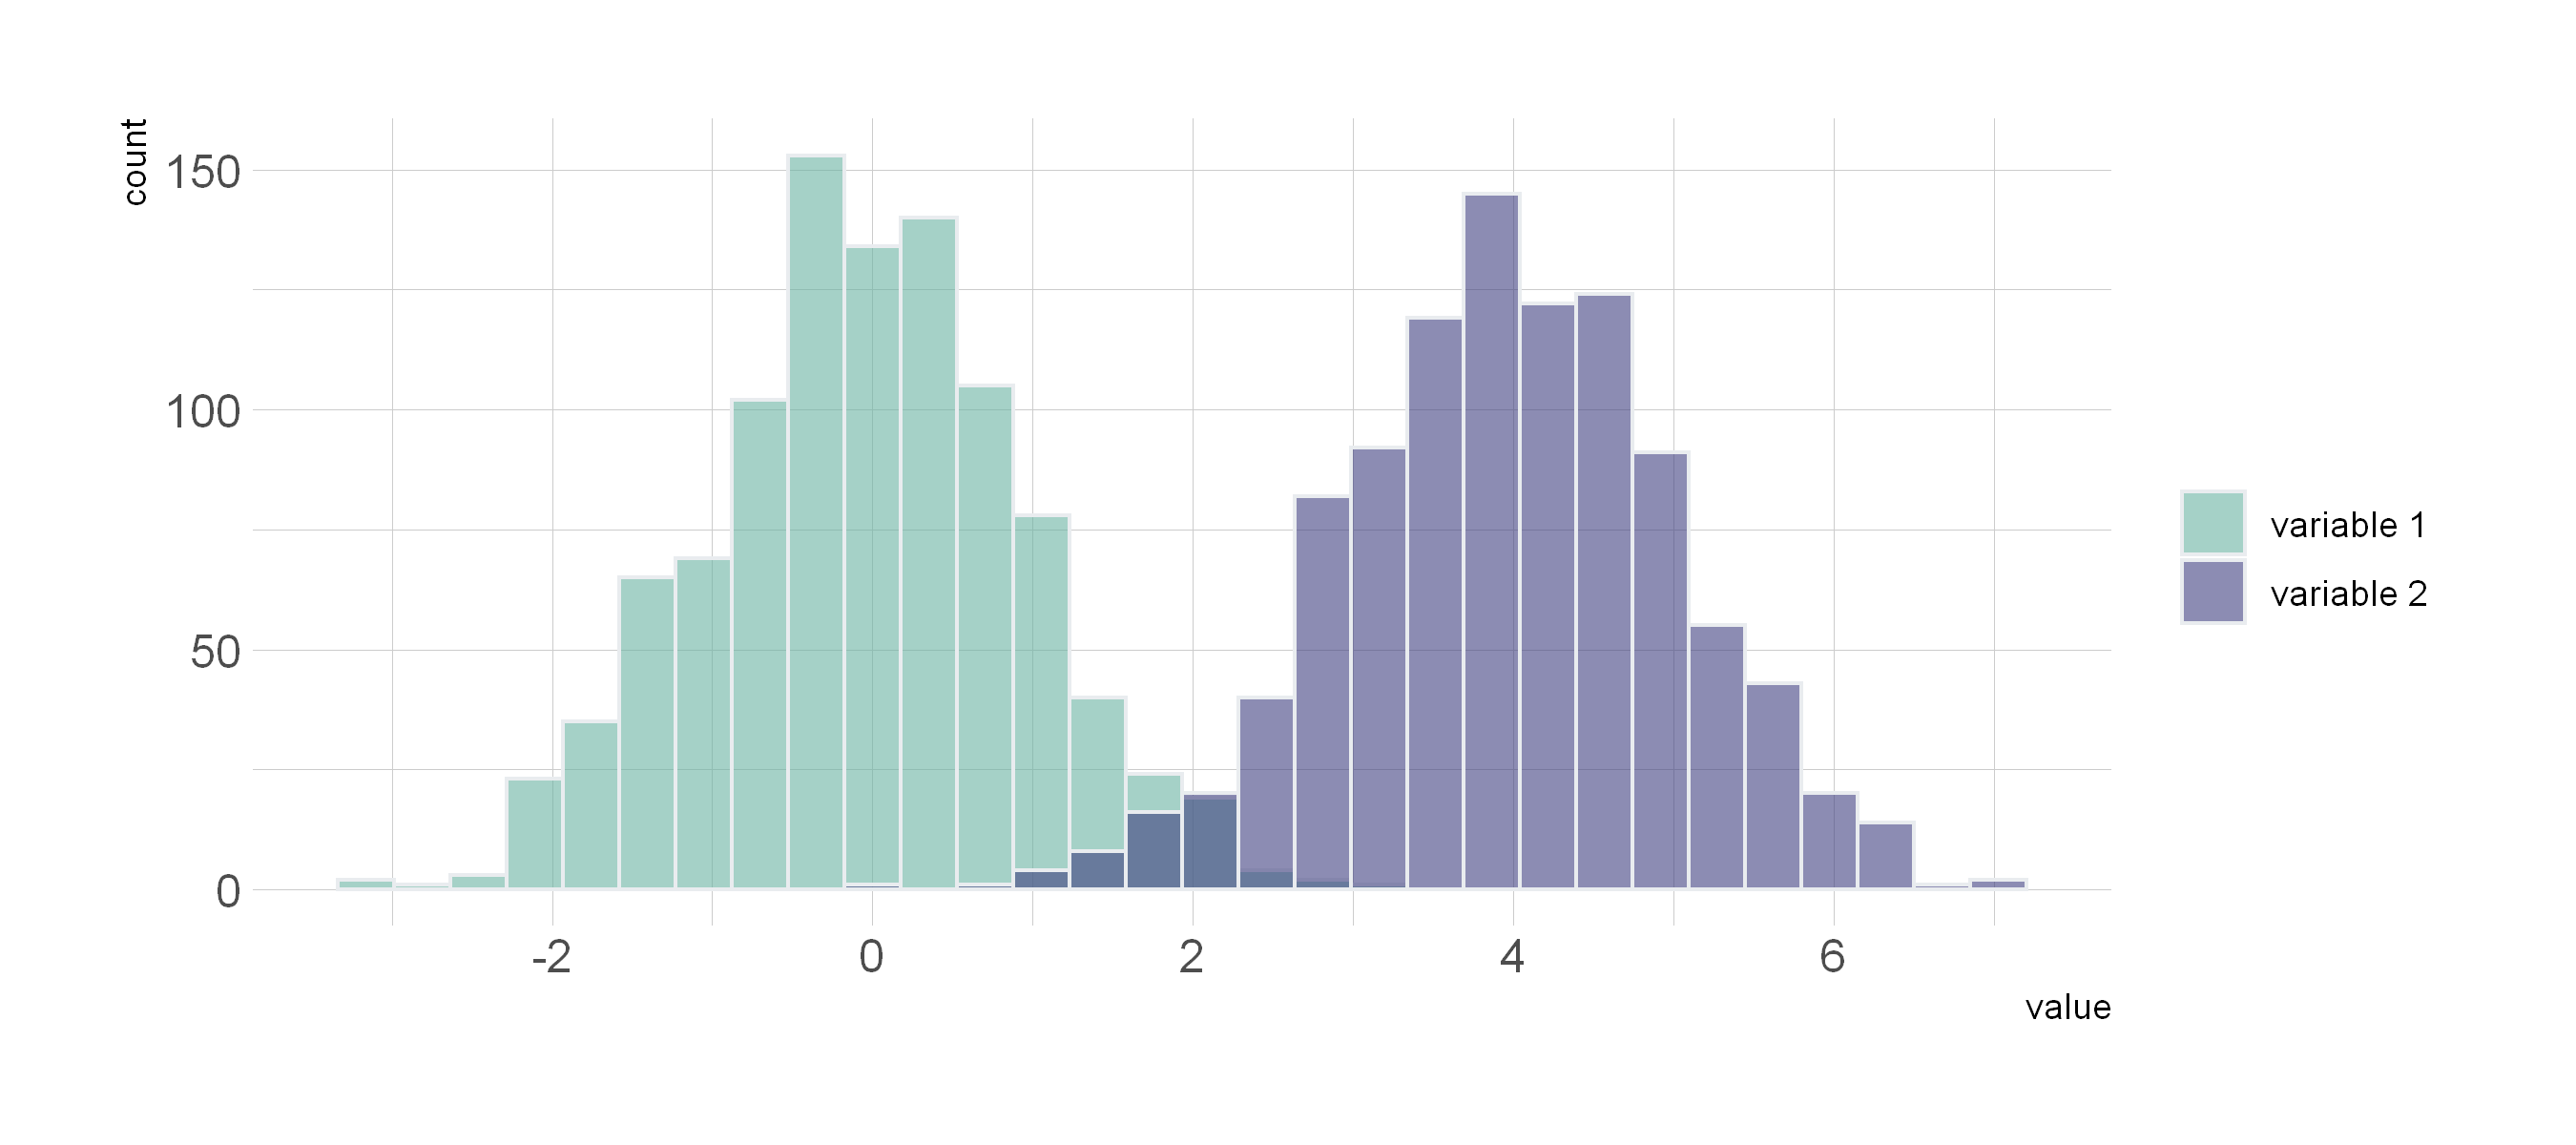

In [10]:
# library
library(ggplot2)
library(dplyr)
library(hrbrthemes)

# Build dataset with different distributions
data <- data.frame(
  type = c( rep("variable 1", 1000), rep("variable 2", 1000) ),
  value = c( rnorm(1000), rnorm(1000, mean=4) )
)

# Represent it
p <- data %>%
  ggplot( aes(x=value, fill=type)) +
    geom_histogram( color="#e9ecef", alpha=0.6, position = 'identity') +
    scale_fill_manual(values=c("#69b3a2", "#404080")) +
    theme_ipsum() +
    labs(fill="")
p

## **using small multiple**

> ถ้ามีข้อมูลหลายกลุ่ม แต่อยากให้อยู่ในแกนเดียวกัน สามารถใช้ฟังก์ชั่น **facet_wrap( )** ของ ggplot2 ได้

Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"


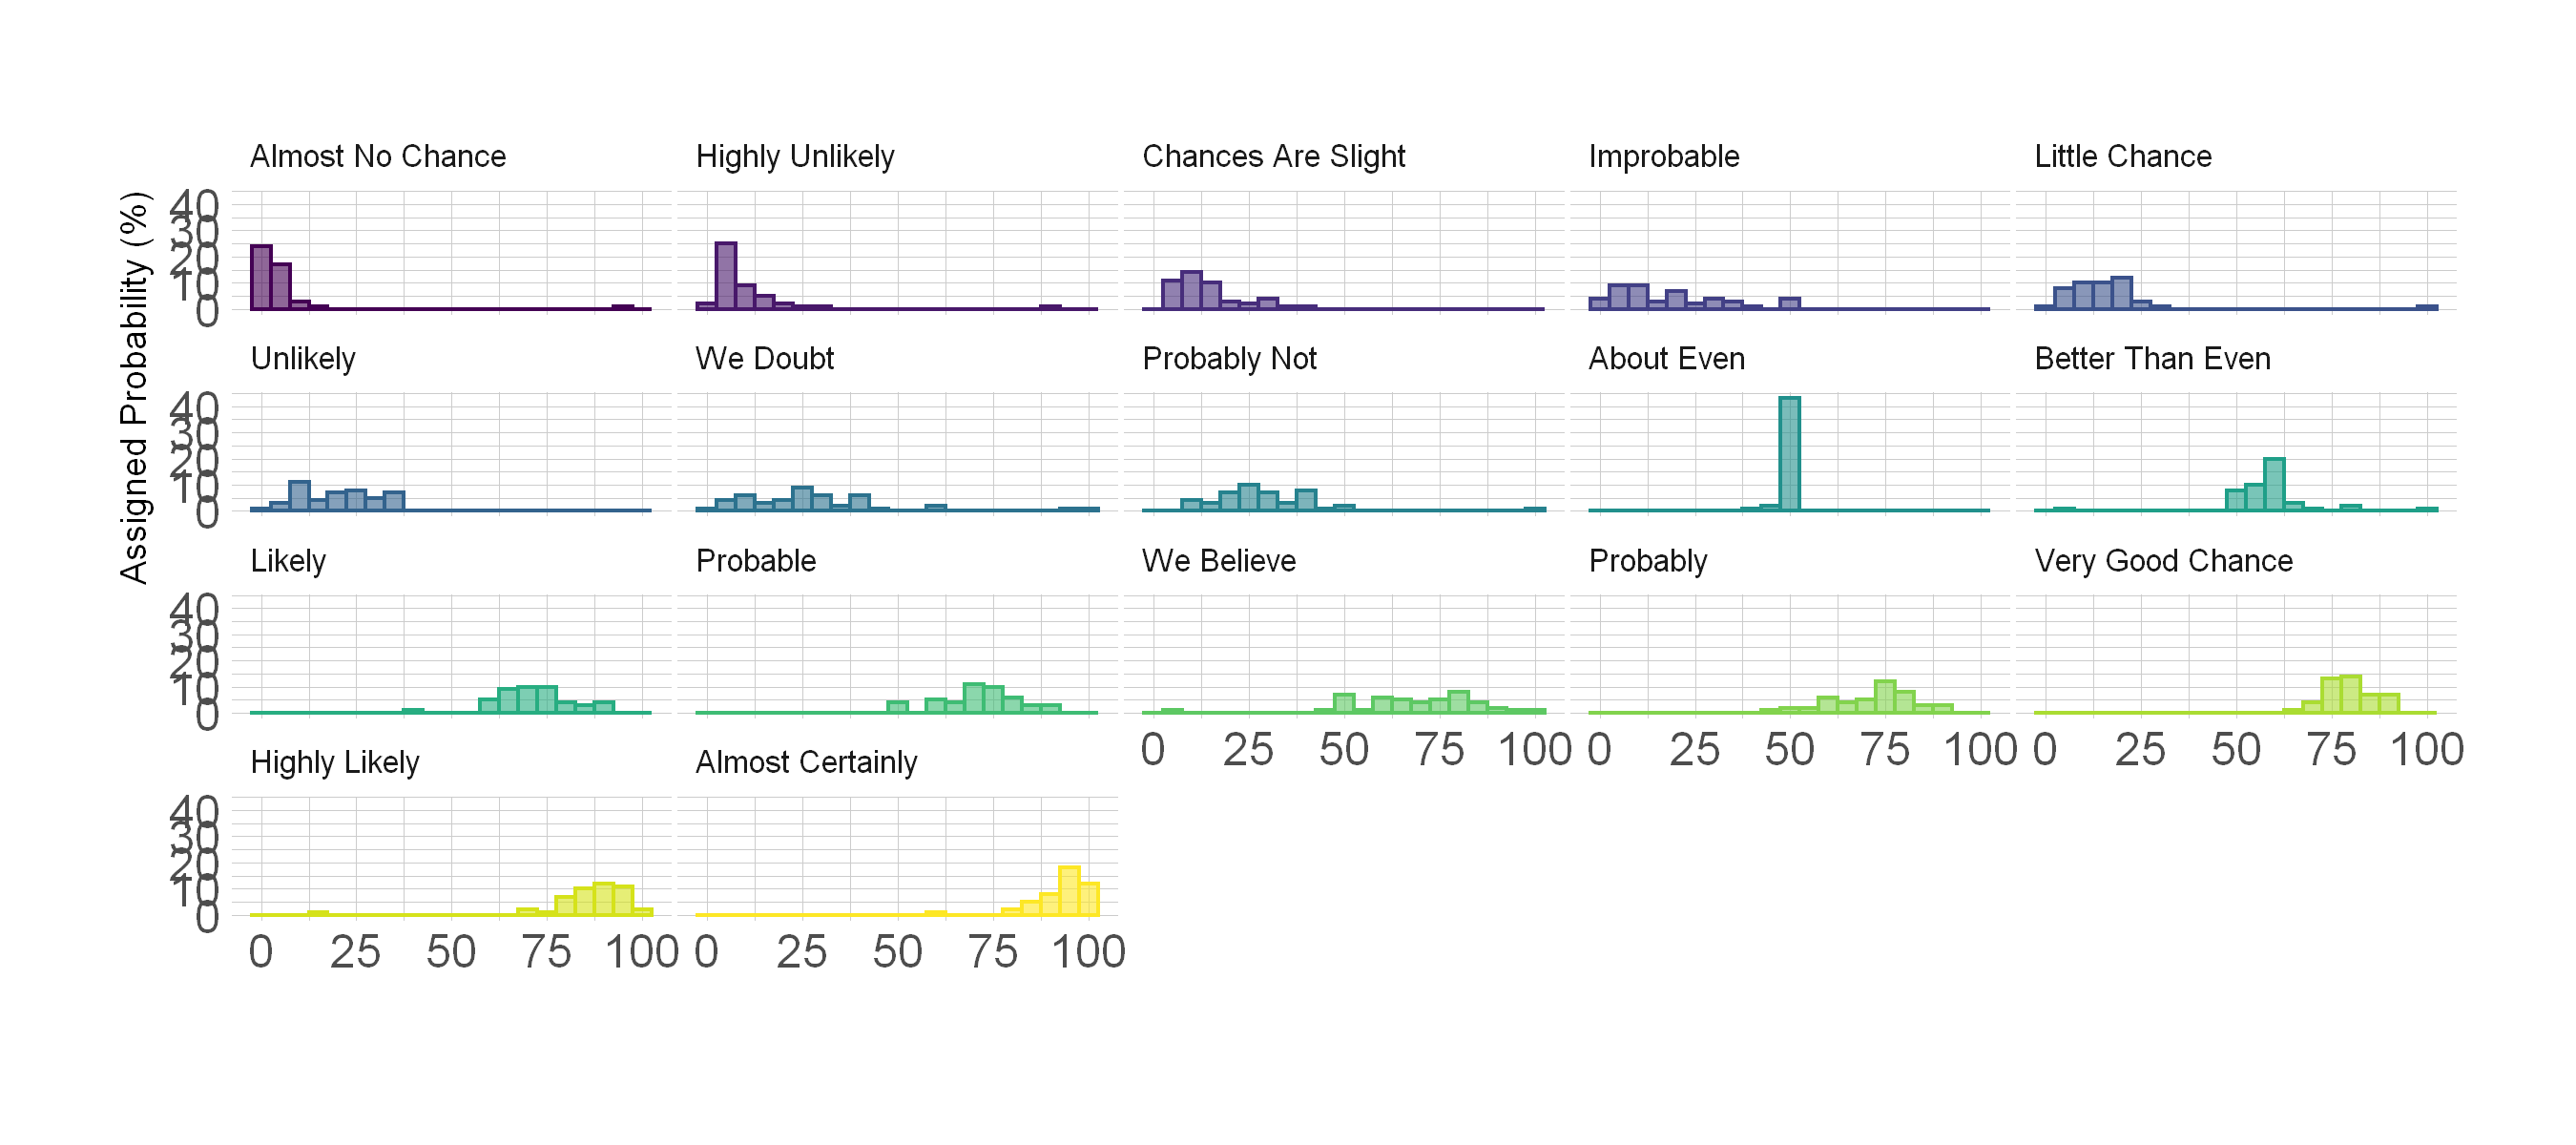

In [33]:
# Libraries
library(tidyverse)
library(hrbrthemes)
library(viridis)
library(forcats)

# Load dataset from github
data <- read.table("https://raw.githubusercontent.com/zonination/perceptions/master/probly.csv", header=TRUE, sep=",")
data <- data %>%
  gather(key="text", value="value") %>%
  mutate(text = gsub("\\.", " ",text)) %>%
  mutate(value = round(as.numeric(value),0))

# plot
p <- data %>%
  mutate(text = fct_reorder(text, value)) %>%
  ggplot( aes(x=value, color=text, fill=text)) +
    geom_histogram(alpha=0.6, binwidth = 5) +
    scale_fill_viridis(discrete=TRUE) +
    scale_color_viridis(discrete=TRUE) +
    theme_ipsum() +
    theme(
      legend.position="none",
      panel.spacing = unit(0.1, "lines"),
      strip.text.x = element_text(size = 8)
    ) +
    xlab("") +
    ylab("Assigned Probability (%)") +
    facet_wrap(~text)
p